### crop을하지 않은 원본 이미지에 바로 접근하여 모델 사용하기

In [17]:
# %autosave 0
import warnings
warnings.filterwarnings(action='ignore')

import cv2
import os
import numpy as np
from PIL import Image

from tensorflow.keras.models import load_model  # model 사용

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

%matplotlib inline

def display(data):
    # print(data)
    # print(type(data))
    sw= np.argmax(data)
    # print('sw:', sw)

    if sw == 0:
        sw = 'Amanda Seyfried'
    elif sw == 1:
        sw = 'Andrew Lincoln'
    elif sw == 2:
        sw = 'Anne Hathaway'
    elif sw == 3:
        sw = 'Hugh Jackman'
    elif sw == 4:
        sw = 'Keira Christina Knightley'        
    elif sw == 5:
        sw = 'JENNIE'   
    elif sw == 6:
        sw = 'Pierce Brosnan'   
    elif sw == 7:
        sw = '조정석'
        
    return sw    

폴더를 입력하세요(actor1, actor2, actor3등): actor2
file: actor2.jpg


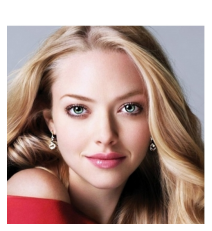

[[1. 0. 0. 0. 0. 0. 0.]]
Amanda Seyfried


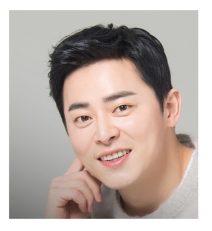

[[0. 0. 0. 0. 0. 0. 1.]]
Pierce Brosnan


In [21]:
model = load_model('./Actor.h5') 

face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

cropDir = input('폴더를 입력하세요(actor1, actor2, actor3등): ') 
path = "./src/" + cropDir  # 3명 찾기

file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith(".jpg")]
count = 0

for file in file_list_py:
    print ("file: {}".format(file))
    img = cv2.imread(path + "/" + file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = face_cascade.detectMultiScale(img, 1.3,5)
    for (x,y,w,h) in faces:
#         print(x, y, w, h);
        cropped = img[y - int(h / 2.5):y + h + int(h / 4), x - int(w / 4):x + w + int(w / 4)]
#         cropped = img[y - 30:y + h + 20, x - 10:x + w + 10]
    
        plt.imshow(cropped)  # 이미지 출력
        plt.axis("off") # off: 축을 출력하지 말것
        plt.show()     # 이미지 출력
    
        
#         shp = cropped.shape
#         print(shp)
#         print(type(cropped))
        
#         cropped = cropped.reshape((1,) + cropped.shape)
        resize_cropped = cv2.resize(cropped, (64, 64))
#         shp = resize_cropped.shape
#         print(shp)
        
        resize_cropped = resize_cropped.reshape((1,) + resize_cropped.shape)
#         shp = resize_cropped.shape
#         print(shp)        
        
        yhat_test = model.predict(resize_cropped, batch_size=1)
#         print(yhat_test.shape)
        print(yhat_test)
        print(display(yhat_test))